<a href="https://colab.research.google.com/github/Varshini1131-hub/Project4---Customer-support-automation-/blob/main/Real%20time%20speech-to-text%20systems%20for%20customer%20support%20automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install SpeechRecognition pydub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 18.6 MB/s eta 0:00:00


In [2]:
import speech_recognition as sr
from pydub import AudioSegment

# Convert audio to WAV format if it's not already
def convert_to_wav(audio_path):
    audio = AudioSegment.from_file(audio_path)
    wav_path = audio_path.split('.')[0] + '.wav'
    audio.export(wav_path, format='wav')
    return wav_path

# Transcribe audio to text
def transcribe_audio(audio_path):
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_path) as source:
        audio = recognizer.record(source)
    try:
        text = recognizer.recognize_google(audio)
        return text
    except sr.UnknownValueError:
        return None
    except sr.RequestError:
        return None

# Example usage
audio_file = '/content/1001_IOM_NEU_XX.wav'
wav_file = convert_to_wav(audio_file)
transcription = transcribe_audio(wav_file)
print(transcription)


I'm on my way to the meeting


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


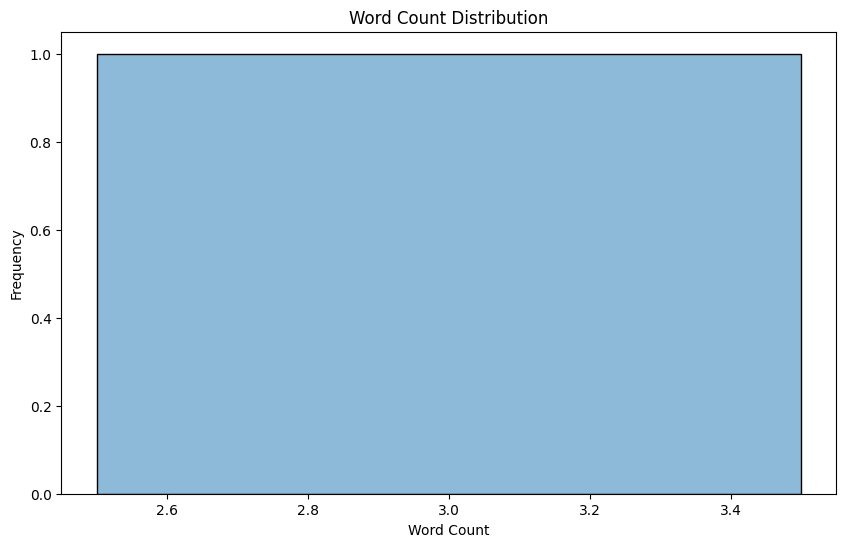

In [5]:
!pip install nltk
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords') # Download the stopwords dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Sample transcriptions
data = {'transcription': [transcription]}  # Replace with your transcriptions
df = pd.DataFrame(data)

# Tokenize words and sentences
df['word_tokens'] = df['transcription'].apply(word_tokenize)
df['sent_tokens'] = df['transcription'].apply(sent_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['filtered_words'] = df['word_tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Word count
df['word_count'] = df['filtered_words'].apply(len)

# Sentence count
df['sent_count'] = df['sent_tokens'].apply(len)

# Average word length
df['avg_word_len'] = df['filtered_words'].apply(lambda x: sum(len(word) for word in x) / len(x) if x else 0)

# Average sentence length
df['avg_sent_len'] = df['word_tokens'].apply(lambda x: len(x) / len(sent_tokenize(' '.join(x))) if x else 0)

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], kde=True)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

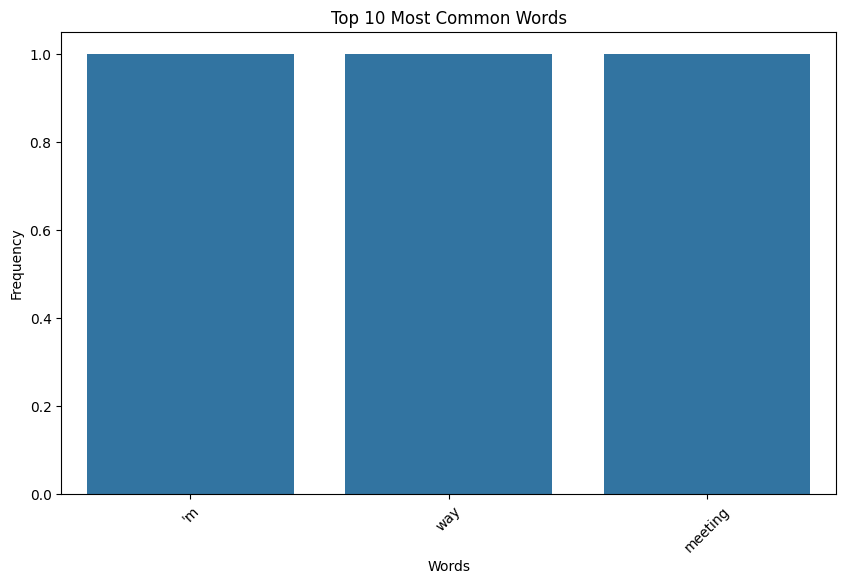

In [6]:
# Word frequency distribution
word_freq = Counter([word.lower() for word in df['filtered_words'].explode()])
common_words = word_freq.most_common(10)

# Plotting the most common words
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(counts))
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [7]:
# Word count analysis
word_count = df['word_count'].sum()
print(f'Total Word Count: {word_count}')


Total Word Count: 3
